<a href="https://colab.research.google.com/github/Rais-19/Coffee-Sales/blob/main/Coffe_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
upload = files.upload()
# read the data
df=pd.read_excel('Coffee.xlsx')

Saving Coffee.xlsx to Coffee.xlsx


In [ ]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [ ]:
df.shape

(149116, 11)

In [ ]:
df.product_category.unique()
df.product_category.value_counts()

,count
product_category,
Coffee,58416
Tea,45449
Bakery,22796
Drinking Chocolate,11468
Flavours,6790
Coffee beans,1753
Loose Tea,1210
Branded,747
Packaged Chocolate,487


we have 9 different categories of product. Coffee leads by a large margin with 58,416 transactions, followed by tea with 45,449. On the other hand, packaged chocolate is the least popular, recording only 487 transactions. This highlights coffee as the primary driver of sales in this dataset.

In [ ]:
df.transaction_qty.unique()

array([2, 1, 3, 4, 8, 6])

We explored the distribution of transaction quantities and found that customers most commonly purchase 1 or 2 items per transaction. Smaller quantities dominate, suggesting individual or quick consumption habits. However, there are also notable purchases of 3, 4, 6, or even 8 items, possibly indicating group orders or bulk buying behavior.

In [ ]:
df.product_type.unique()


array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

There are 29 unique products in the dataset, ranging from various coffee and tea types to syrups, baked goods, and merchandise. This variety reflects a diverse product mix, likely catering to different customer preferences and needs. Coffee and tea options dominate, supporting earlier findings about their high sales frequency.

In [ ]:
df.store_id.value_counts()

,count
store_id,
8,50735
3,50599
5,47782


In [ ]:
df.store_location.unique()

array(['Lower Manhattan', "Hell's Kitchen", 'Astoria'], dtype=object)

This dataset focuses on coffee-related sales across only three store locations. This limited scope allows for more targeted analysis and simplifies cross-store comparisons.

In [ ]:
df.product_detail.value_counts()

,count
product_detail,
Chocolate Croissant,3076
Earl Grey Rg,3053
Dark chocolate Lg,3029
Morning Sunrise Chai Rg,3026
Columbian Medium Roast Rg,3013
...,...
Jamacian Coffee River,146
Earl Grey,142
Guatemalan Sustainably Grown,134


The dataset includes 80 distinct product details, reflecting specific flavors, blends, and serving sizes. Top-selling items include chocolate croissants and flavored teas, each with over 3,000 transactions. In contrast, niche products like “Spicy Eye Opener Chai” and “Guatemalan Sustainably Grown” are less frequent. This variety highlights both customer favorites and low-demand items worth further analysis.

The dataset consists of 149,116 rows and 11 columns, providing a rich base for analysis. It includes 6 distinct transaction quantities and 9 product categories sold across 3 different store locations. Additionally, there are 29 unique product types and 80 different product details, offering a wide range of customer purchase patterns and sales insights to explore.

# Data Cleaning:

In [ ]:
df.isnull().sum()

,0
transaction_id,0
transaction_date,0
transaction_time,0
transaction_qty,0
store_id,0
store_location,0
product_id,0
unit_price,0
product_category,0
product_type,0


In [ ]:
df.duplicated().sum()

np.int64(0)

there's no duplication or missing values,the data is clean so we can move to data analysis.

# Data Analysis:

In [ ]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723


In [ ]:
df.describe(include='object')

,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116
unique,25762,3,9,29,80
top,09:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,41,50735,58416,17183,3076


we'll drop IDs for further analysis as we won't need them during our analysis.

In [ ]:
df.drop(['transaction_id','product_id','store_id'],axis=1,inplace=True)

**Product Category Analysis:**

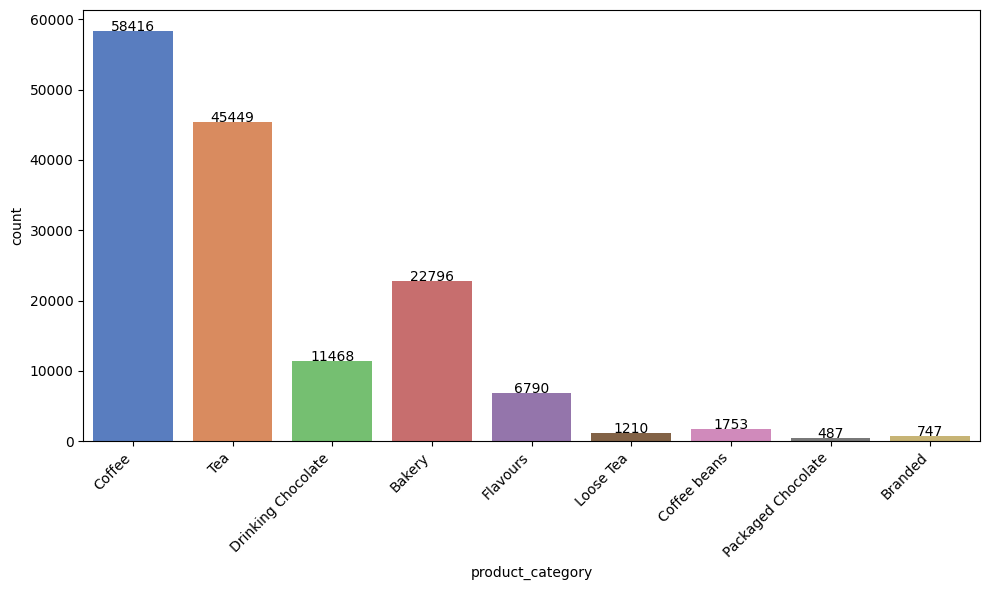

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='product_category', data=df, palette="muted")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.5,
        s=f'{int(height)}',
        ha='center'
    )

plt.show()

Coffee clearly dominates sales with 58,416 orders, followed by tea at 45,449. Mid-level sales are observed in bakery items, drinking chocolate, and flavored products. In contrast, branded goods, loose tea, coffee beans, and packaged chocolate appear less frequently in transactions. This trend emphasizes the core demand for brewed beverages over specialty or packaged items.

In [ ]:
df.product_type.unique()

array(['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate',
       'Drip coffee', 'Scone', 'Barista Espresso', 'Brewed Black tea',
       'Brewed Green tea', 'Brewed herbal tea', 'Biscotti', 'Pastry',
       'Organic brewed coffee', 'Premium brewed coffee', 'Regular syrup',
       'Herbal tea', 'Gourmet Beans', 'Organic Beans', 'Sugar free syrup',
       'Drinking Chocolate', 'Premium Beans', 'Chai tea', 'Green beans',
       'Espresso Beans', 'Green tea', 'Organic Chocolate', 'Housewares',
       'Black tea', 'House blend Beans', 'Clothing'], dtype=object)

In [ ]:
df.groupby('product_category')['product_type'].value_counts()

product_category    product_type         
Bakery              Scone                    10173
                    Pastry                    6912
                    Biscotti                  5711
Branded             Housewares                 526
                    Clothing                   221
Coffee              Gourmet brewed coffee    16912
                    Barista Espresso         16403
                    Organic brewed coffee     8489
                    Drip coffee               8477
                    Premium brewed coffee     8135
Coffee beans        Organic Beans              415
                    Gourmet Beans              366
                    Premium Beans              336
                    Espresso Beans             319
                    House blend Beans          183
                    Green beans                134
Drinking Chocolate  Hot chocolate            11468
Flavours            Regular syrup             4979
                    Sugar free syrup          1811
Loose Tea           Chai tea                   443
                    Herbal tea                 305
                    Black tea                  303
                    Green tea                  159
Packaged Chocolate  Drinking Chocolate         266
                    Organic Chocolate          221
Tea                 Brewed Chai tea          17183
                    Brewed Black tea         11350
                    Brewed herbal tea        11245
                    Brewed Green tea          5671
Name: count, dtype: int64

The data highlights a clear dominance of beverage sales, particularly brewed drinks like Chai Tea (17,183 units) and Gourmet Coffee (16,912 units), which collectively account for over two-thirds of total volume. Bakery items such as Scones (10,173 units) perform well but lag behind beverages, while niche products like Housewares (526 units) and Packaged Chocolate (266 units) show minimal traction.

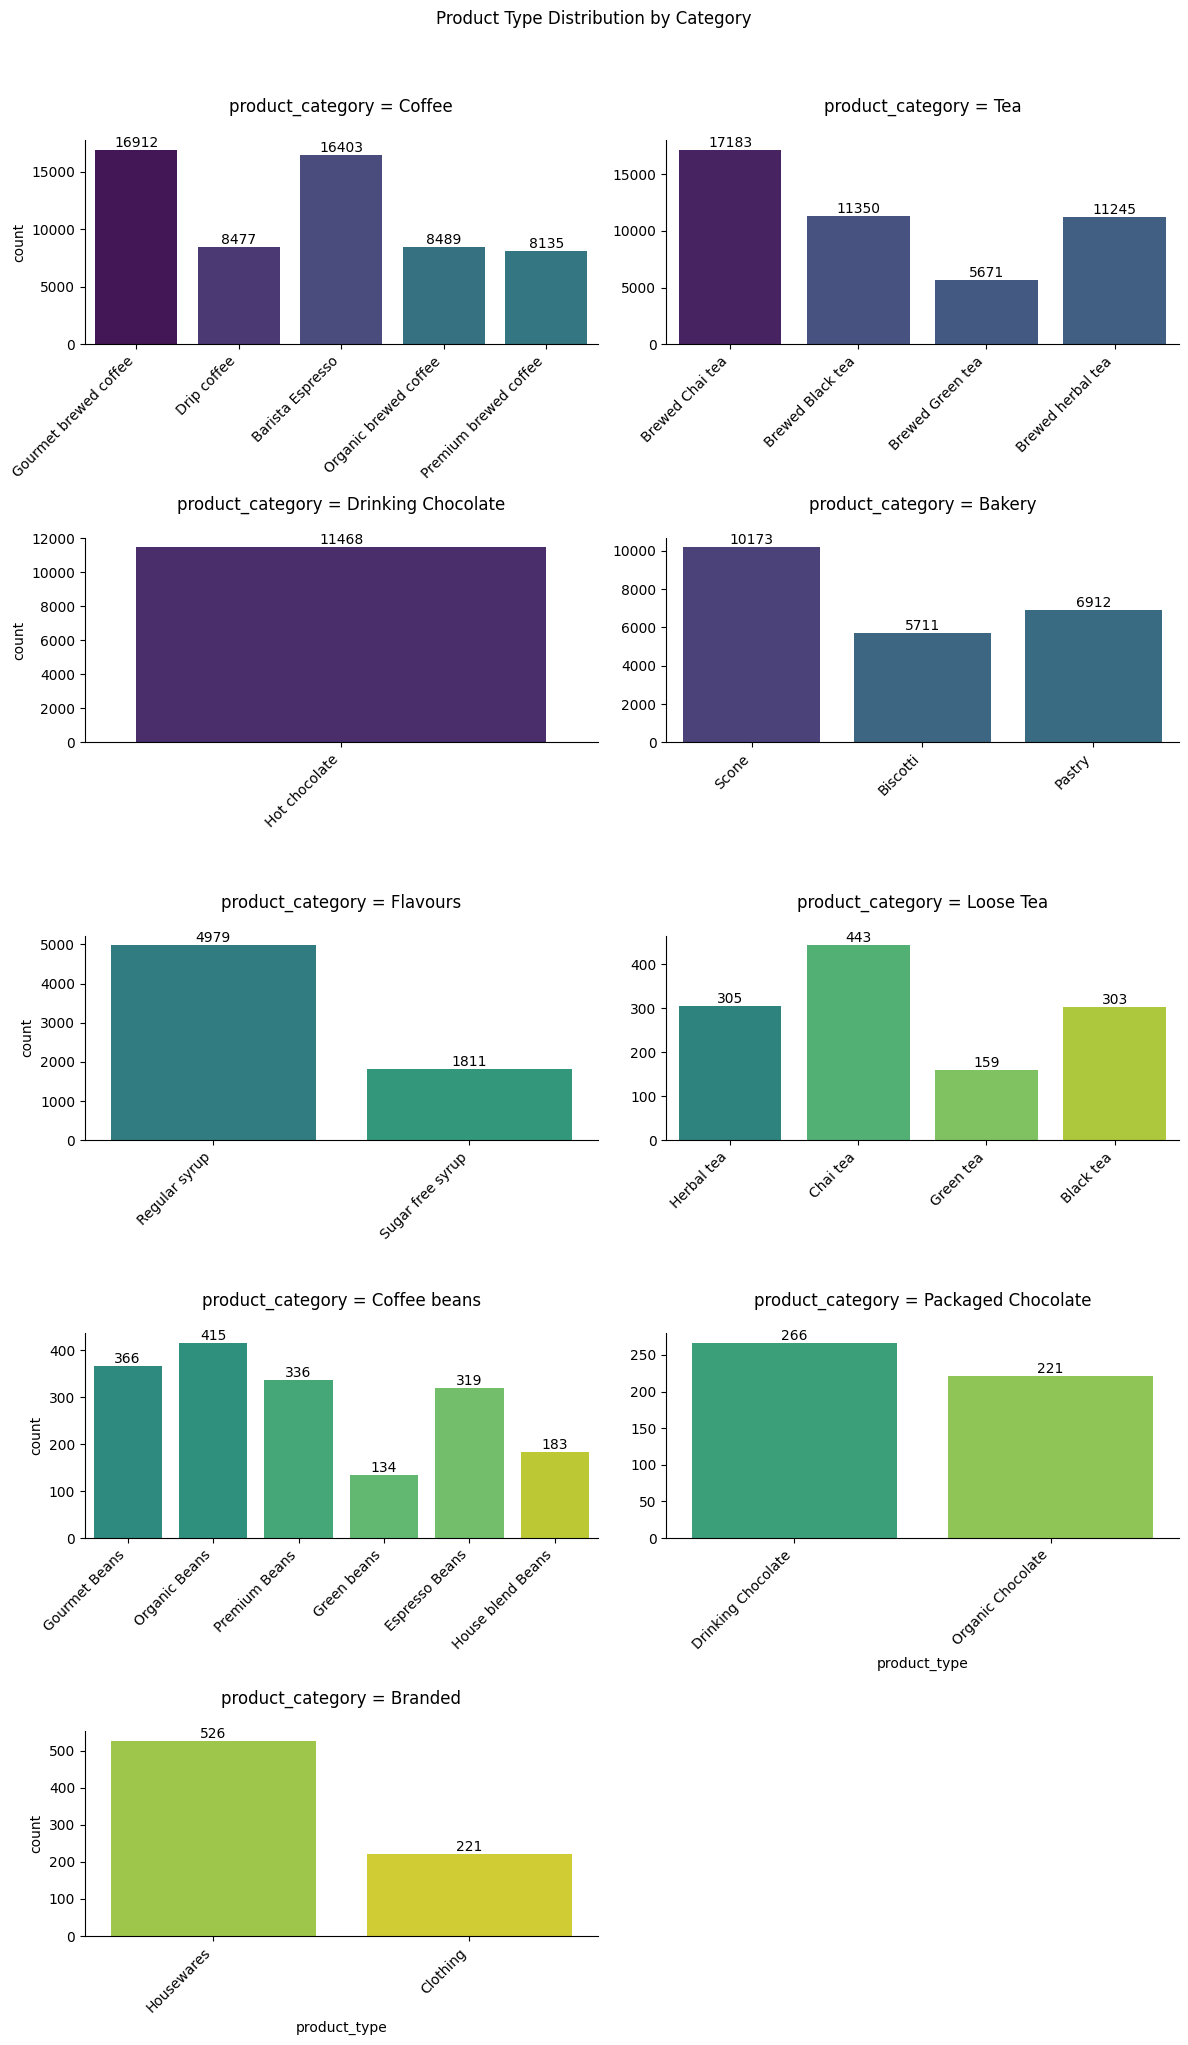

In [ ]:
palette = "viridis"
g = sns.catplot(
    x='product_type',
    kind='count',
    col='product_category',
    col_wrap=2,
    data=df,
    sharex=False,
    sharey=False,
    height=4,
    aspect=1.5,
    palette=palette
)

for ax in g.axes.flat:

    for p in ax.patches:
        ax.annotate(
            f'{p.get_height():.0f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='center',
            xytext=(0, 5),
            textcoords='offset points',
            fontsize=10
        )

    ax.set_xticklabels(ax.get_xticklabels(),
                      rotation=45,
                      horizontalalignment='right')
    ax.set_title(ax.get_title(), pad=20)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Product Type Distribution by Category', y=1.02)
plt.tight_layout()
plt.show()

<Axes: xlabel='product_category', ylabel='unit_price'>

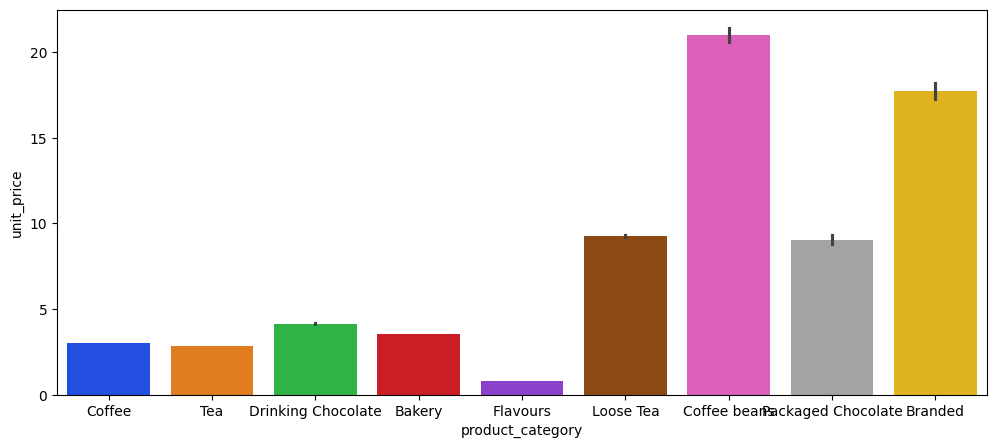

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='product_category',y='unit_price',data=df,palette="bright")

In terms of unit price, baked coffee products are the most expensive, followed closely by branded items. Loose tea and packaged chocolate fall in the mid-price range, averaging around $10 per unit. Other categories are priced lower, which likely contributes to their higher sales volume. This suggests a strong link between affordability and purchase frequency in this dataset.

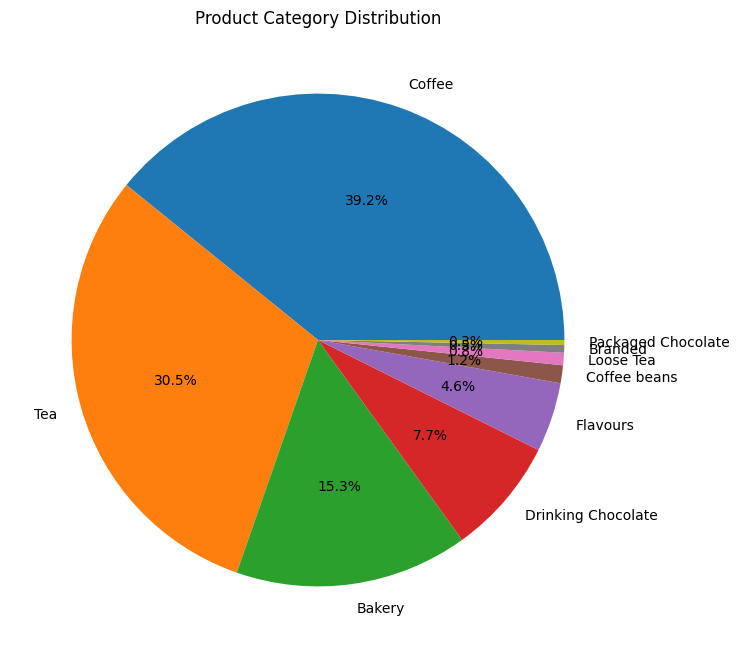

In [ ]:
plt.figure(figsize=(14,8))
plt.pie(df['product_category'].value_counts(),labels=df['product_category'].value_counts().index,autopct='%1.1f%%')
plt.title("Product Category Distribution")
plt.show()

The product category distribution shows that coffee is the dominant category, accounting for 39.2% of total sales, followed by tea at 30.5%. Bakery items, flavors, and drinking chocolate hold moderate shares. In contrast, categories like coffee beans and loose tea are rarely consumed, each making up less than 1.2% of overall transactions. This highlights clear customer preferences for brewed beverages.

# Date Analysis:

In [ ]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [ ]:
df.transaction_date.unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 181, dtype: datetime64[ns]

to do further analysis, we will split the date into year,month ,day and hour

In [ ]:
df["year"]=df["transaction_date"].dt.year
df["month"]=df["transaction_date"].dt.month
df["day"]=df["transaction_date"].dt.day

In [ ]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1


In [ ]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S')
df["hour"] = df["transaction_time"].dt.hour
df["minute"] = df["transaction_time"].dt.minute
df["second"] = df["transaction_time"].dt.second

In [ ]:
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6,11
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8,56


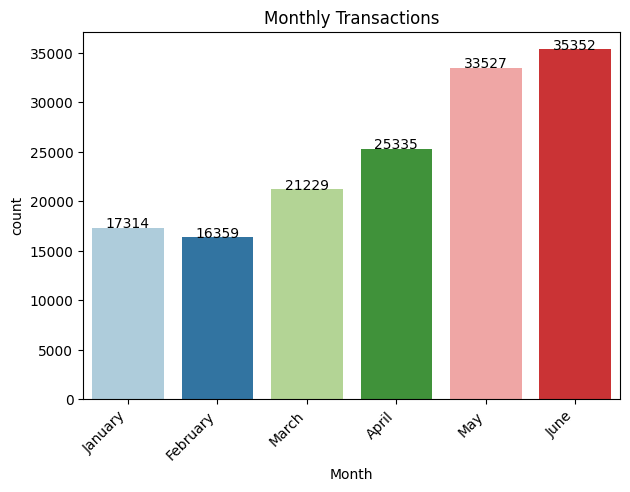

In [ ]:
month_map = {
  1: 'January', 2: 'February', 3: 'March', 4: 'April',
  5: 'May', 6: 'June', 7: 'July', 8: 'August',
  9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
df['Month'] = df['month'].map(month_map)
ax=sns.countplot(x='Month',data=df,palette="Paired")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.5,
        s=f'{int(height)}',
        ha='center'
    )
plt.title("Monthly Transactions")
plt.show()

Monthly transaction analysis reveals a clear upward trend in customer activity. January and February show similar transaction counts, with 17,314 and 16,359 respectively. From March onward, the number of transactions steadily increases, peaking at 35,352 in June. This growth may indicate seasonal demand or increased customer engagement over time.

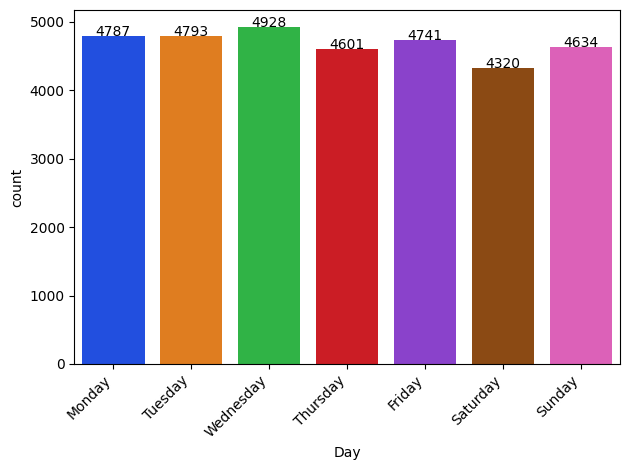

In [ ]:
day_map = {
  1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
  5: 'Friday', 6: 'Saturday', 7: 'Sunday'
}
df['Day'] = df['day'].map(day_map)
ax=sns.countplot(x='Day',data=df,palette="bright")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 0.5,
        s=f'{int(height)}',
        ha='center'
    )

plt.show()

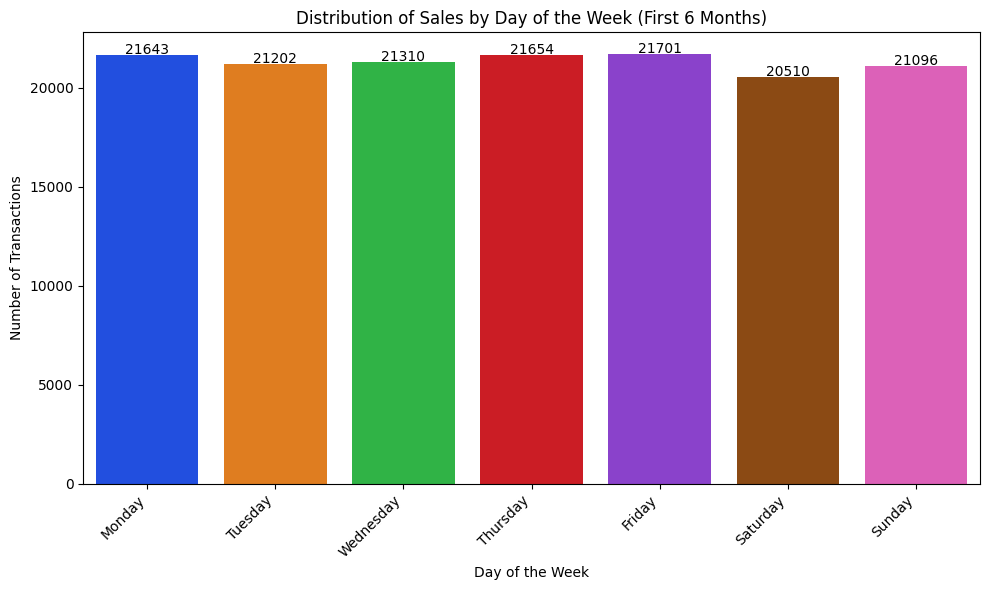

In [ ]:

import matplotlib.pyplot as plt
df['day_of_week'] = df['transaction_date'].dt.day_name()

# Filter data for the first 6 months
df_first_6_months = df[df['month'].isin([1, 2, 3, 4, 5, 6])]

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='day_of_week', data=df_first_6_months, palette="bright", order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Sales by Day of the Week (First 6 Months)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=height + 50,
        s=f'{int(height)}',
        ha='center'
    )

plt.show()


The daily distribution of sales shows a fairly consistent pattern, with no single day standing out as a clear outlier. Coffee consumption appears stable throughout the week, with daily transaction counts ranging between 20,510 and 21,710. This consistency suggests a steady demand for coffee products across all days.

<function matplotlib.pyplot.show(close=None, block=None)>

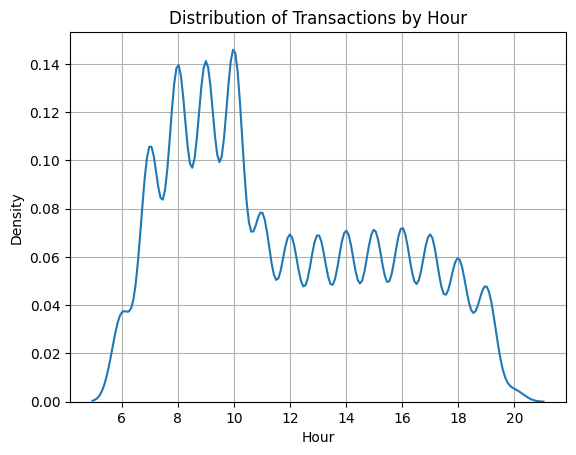

In [ ]:
sns.kdeplot(data=df, x='hour')
plt.grid(True)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour')
plt.ylabel('Density')
plt.show

The hourly transaction distribution shows a strong morning peak, with demand rising from 6 AM and peaking between 8 AM and 10 AM. This aligns with typical morning routines, as customers tend to consume coffee before or during work. Sales remain steady through the afternoon and gradually decline starting from 7 PM.

In [ ]:
df.drop(['day_name','month_name'],axis=1,inplace=True)



KeyError: "['day_name', 'month_name'] not found in axis"

In [ ]:
df.drop(['day_of_week'],axis=1,inplace=True)

In [ ]:
df.head(2)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second,Day,Month
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6,11,Monday,January
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8,56,Monday,January


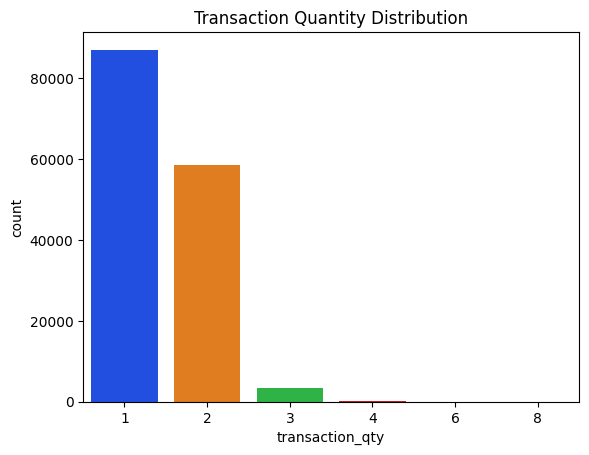

In [ ]:
sns.countplot(x='transaction_qty',data=df,palette="bright")
plt.title("Transaction Quantity Distribution")
plt.show()

Transaction quantity analysis shows that most customers purchase a single coffee item, totaling over 80,000 orders. Around 60,000 transactions involve two items, likely indicating shared purchases or small groups. Higher quantities like 3, 4, 6, or 8 are rare, possibly due to the dataset representing individual in-store visits or quick takeaway habits rather than bulk or group orders.

([<matplotlib.patches.Wedge at 0x7b21d755db10>,
 [Text(0.5292067220033454, 0.9643340942777426, "Hell's Kitchen"),
  Text(-1.0978718512826229, -0.06839150649946776, 'Astoria'),
  Text(0.5881398910431787, -0.9295652040409635, 'Lower Manhattan')],
 [Text(0.28865821200182473, 0.5260004150605868, '34.0%'),
  Text(-0.5988391916087032, -0.037304458090618775, '33.9%'),
  Text(0.32080357693264283, -0.5070355658405254, '32.0%')])

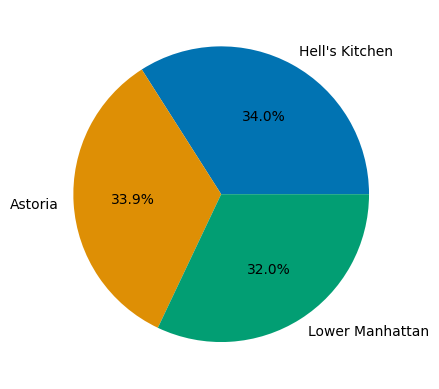

In [ ]:
plt.pie(df['store_location'].value_counts(),labels=df['store_location'].value_counts().index,autopct='%1.1f%%',colors=sns.color_palette('colorblind'))


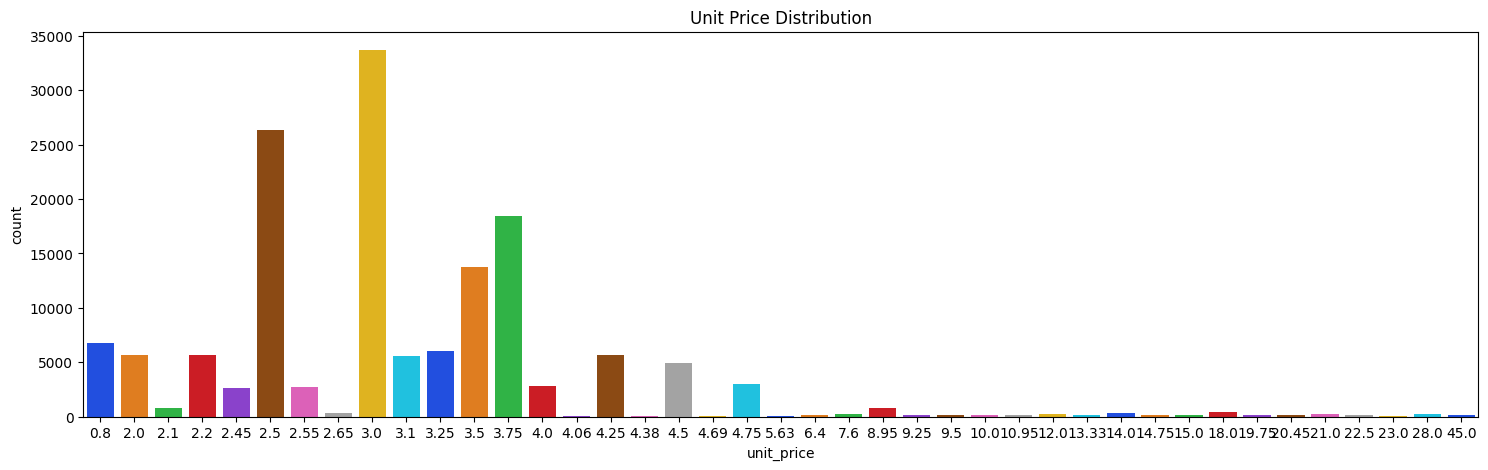

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x='unit_price',data=df,palette="bright")
plt.title("Unit Price Distribution")
plt.show()


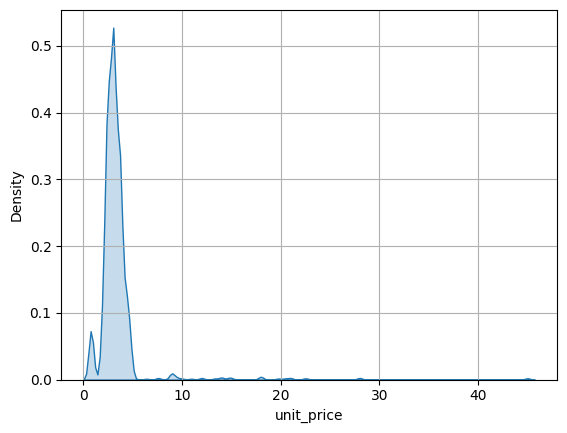

In [ ]:
sns.kdeplot(x = df["unit_price"], fill = True)
plt.grid(True)
plt.show()

In [ ]:
df.head(2)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second,Day,Month
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6,11,Monday,January
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8,56,Monday,January


# Price Distribution:

In [ ]:
df.head(2)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second,Day,Month
0,2023-01-01,1900-01-01 07:06:11,2,Lower Manhattan,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6,11,Monday,January
1,2023-01-01,1900-01-01 07:08:56,2,Lower Manhattan,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8,56,Monday,January


In [ ]:
df["revenue"]=df.transaction_qty * df.unit_price
df.revenue

,revenue
0,6.00
1,6.20
2,9.00
3,2.00
4,6.20
...,...
149111,5.00
149112,6.00
149113,3.00
149114,3.75


In [ ]:
df.sample(10)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second,Month,revenue
129300,129637,2023-06-14,1900-01-01 09:23:38,1,3,Astoria,23,2.50,Coffee,Drip coffee,Our Old Time Diner Blend Rg,2023,6,14,9,23,38,June,2.50
2542,2543,2023-01-05,1900-01-01 15:32:59,1,8,Hell's Kitchen,47,3.00,Tea,Brewed Green tea,Serenity Green Tea Lg,2023,1,5,15,32,59,January,3.00
73855,74025,2023-04-23,1900-01-01 09:49:43,1,3,Astoria,79,3.75,Bakery,Scone,Jumbo Savory Scone,2023,4,23,9,49,43,April,3.75
48733,48840,2023-03-22,1900-01-01 15:19:17,1,3,Astoria,41,4.25,Coffee,Barista Espresso,Cappuccino Lg,2023,3,22,15,19,17,March,4.25
135775,136112,2023-06-19,1900-01-01 10:24:04,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,6,19,10,24,4,June,6.00
145710,146047,2023-06-27,1900-01-01 16:28:42,1,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,2023,6,27,16,28,42,June,2.45
56796,56907,2023-04-03,1900-01-01 12:12:02,1,3,Astoria,25,2.20,Coffee,Organic brewed coffee,Brazilian Sm,2023,4,3,12,12,2,April,2.20
105346,105600,2023-05-23,1900-01-01 18:18:18,1,3,Astoria,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,2023,5,23,18,18,18,May,3.75
114667,114929,2023-06-01,1900-01-01 17:20:25,2,3,Astoria,43,3.00,Tea,Brewed herbal tea,Lemon Grass Lg,2023,6,1,17,20,25,June,6.00
57878,57989,2023-04-04,1900-01-01 16:36:57,2,3,Astoria,46,2.50,Tea,Brewed Green tea,Serenity Green Tea Rg,2023,4,4,16,36,57,April,5.00


In [ ]:
category_revenue=df.groupby('product_category')['revenue'].sum()
category_revenue

,revenue
product_category,
Bakery,82315.64
Branded,13607.00
Coffee,269952.45
Coffee beans,40085.25
Drinking Chocolate,72416.00
Flavours,8408.80
Loose Tea,11213.60
Packaged Chocolate,4407.64
Tea,196405.95


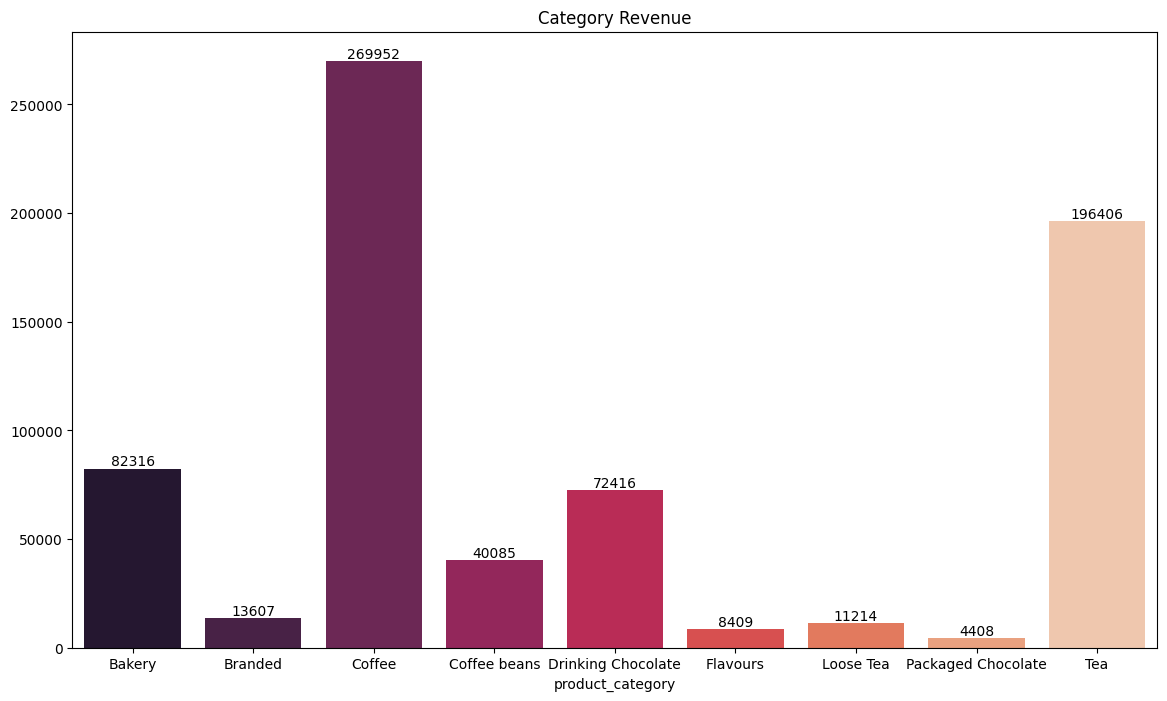

In [ ]:
plt.figure(figsize=(14, 8))
palette="rocket"
ax=sns.barplot(x=category_revenue.index,y=category_revenue.values,palette=palette,
    saturation=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')
plt.title("Category Revenue")
plt.show()

Coffee generates the highest revenue at  269,952 , followed by tea with 194,406. Bakery and drinking chocolate also show solid performance, earning 82,316 and $72,416 respectively—likely due to moderate pricing and steady demand. In contrast, rarely sold products contribute less to total revenue, which aligns with their minimal share in overall sales volume.

In [ ]:
store_revenue=df.groupby('store_location')['revenue'].sum()
store_revenue

,revenue
store_location,
Astoria,232243.91
Hell's Kitchen,236511.17
Lower Manhattan,230057.25


Revenue across the three store locations—Astoria, Hell's Kitchen, and Lower Manhattan—is nearly identical, each contributing around  230K–236K. This consistency suggests a balanced sales performance.

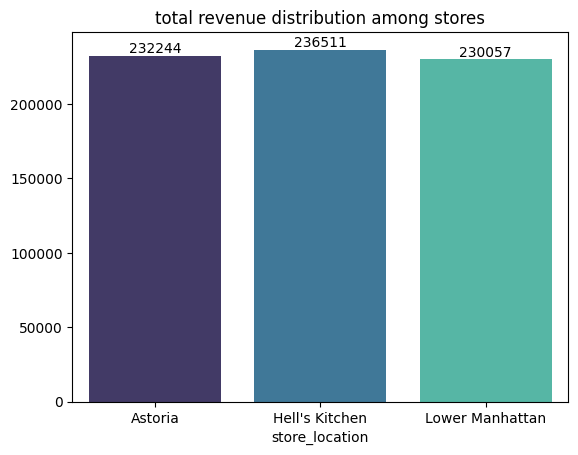

In [ ]:
palette="mako"
ax=sns.barplot(x=store_revenue.index,y=store_revenue.values,palette=palette,
    saturation=0.8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')
plt.title("total revenue distribution among stores")
plt.show()

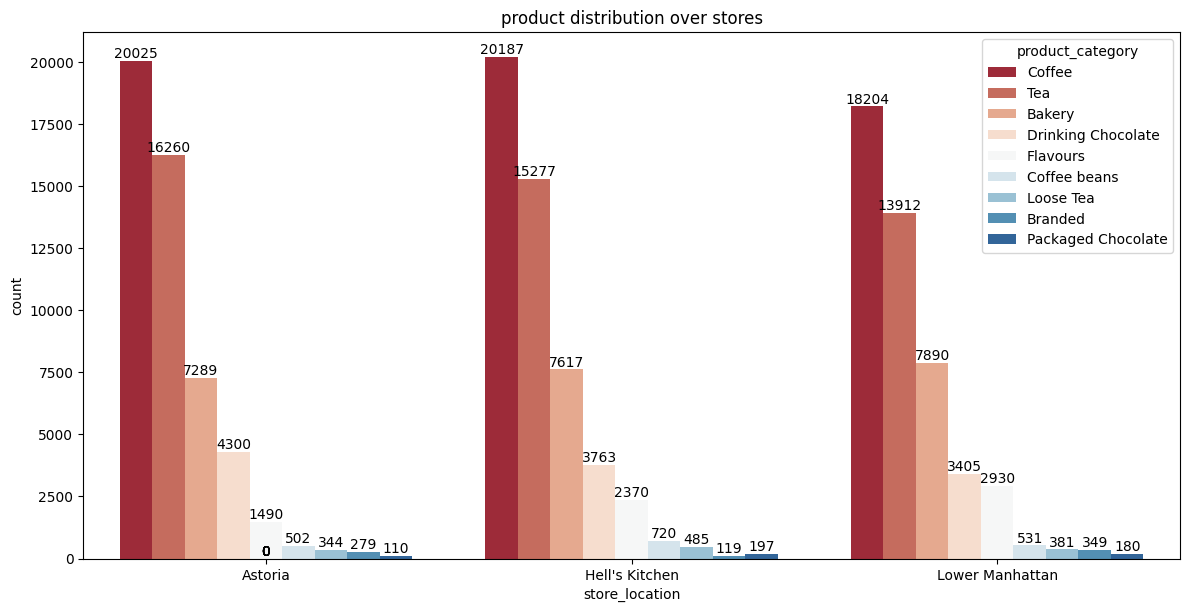

In [ ]:
popular_products = df.groupby('store_location')[['product_category']].value_counts().reset_index(name='count')
popular_products
plt.figure(figsize=(12, 6))
ax=sns.barplot(x = 'store_location', y = 'count', hue = 'product_category', data = popular_products, palette = "RdBu")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')


plt.tight_layout()
plt.title("product distribution over stores")
plt.show()

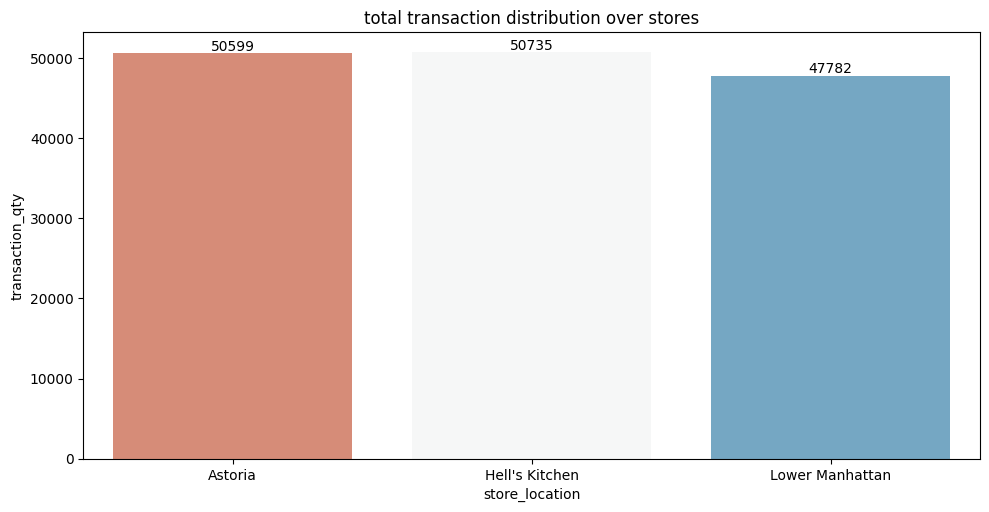

In [ ]:
transaction=df.groupby('store_location')['transaction_qty'].count().reset_index()
plt.figure(figsize=(10, 5))
ax=sns.barplot(x = 'store_location', y = 'transaction_qty', data = transaction, palette = "RdBu")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext = (0, 5), textcoords = 'offset points')


plt.tight_layout()
plt.title("total transaction distribution over stores")
plt.show()

<Axes: xlabel='hour', ylabel='count'>

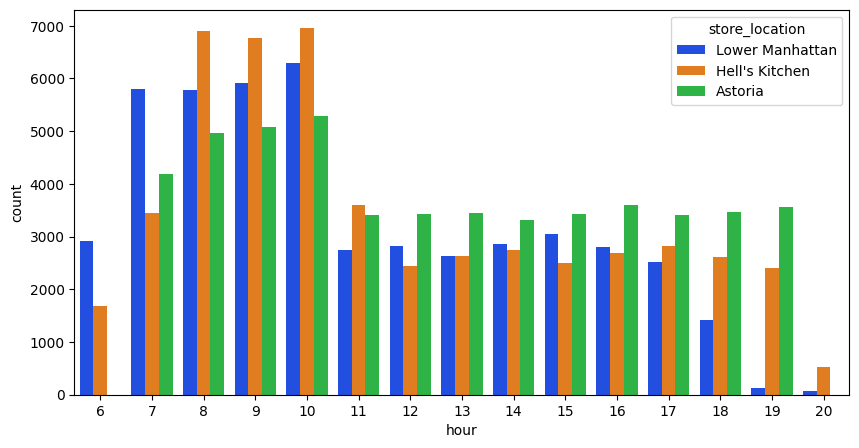

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='hour',data=df,palette="bright",hue="store_location")

The hourly breakdown by store reveals that all locations experience peak activity between 8 AM and 10 AM, with Hell's Kitchen leading in morning transactions. In contrast, Astoria maintains stronger sales during the afternoon hours. Lower Manhattan shows consistent performance but slightly lags behind the other two in overall hourly activity. These patterns reflect location-specific customer behavior.

In [ ]:
df['time_quarter'] = pd.cut(df['minute'],
                            bins=[0, 15, 30, 45, 60],
                            labels=['1-15', '16-30', '31-45', '46-60'],
                            right=True,
                            include_lowest=True)
df.head(2)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,year,month,day,hour,minute,second,Month,revenue,time_quarter
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,2023,1,1,7,6,11,January,6.0,1-15
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,2023,1,1,7,8,56,January,6.2,1-15


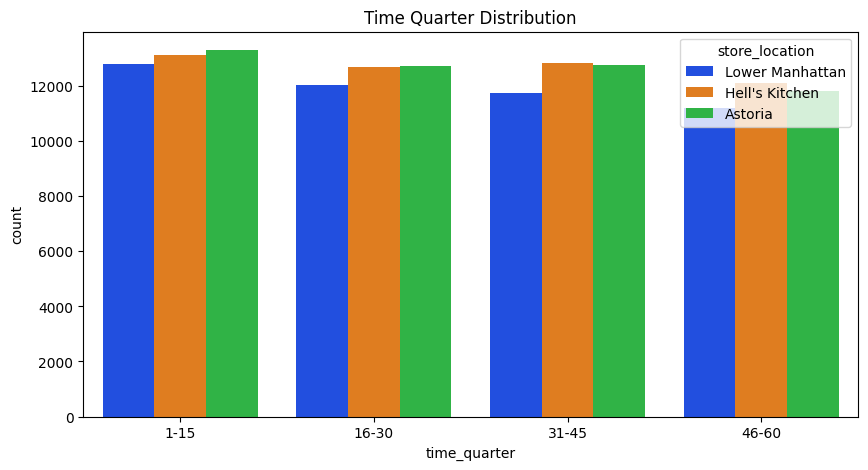

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='time_quarter',data=df,palette="bright",hue="store_location")
plt.title("Time Quarter Distribution")
plt.show()

Although the variation is slight, all stores consistently experience higher transaction counts during the first quarter of each hour. This pattern may be explained by customers arriving right after the hour begins, possibly due to scheduled breaks, meetings, or transit schedules. It reflects a natural flow in customer behavior aligned with time-based routines.


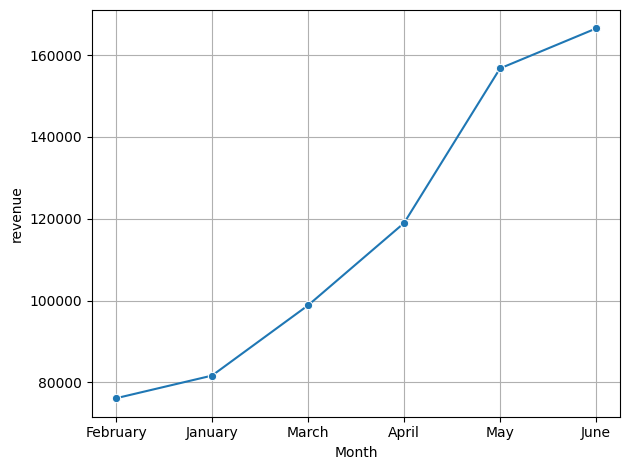

In [ ]:
monthly_revenue  = df.groupby("Month")["revenue"].sum().reset_index().sort_values(by = "revenue")
monthly_revenue
sns.lineplot(x = "Month", y = "revenue", data = monthly_revenue , marker = "o")
plt.grid(True)
plt.tight_layout()
plt.show()